# Session 2-2: Pandas 🐼
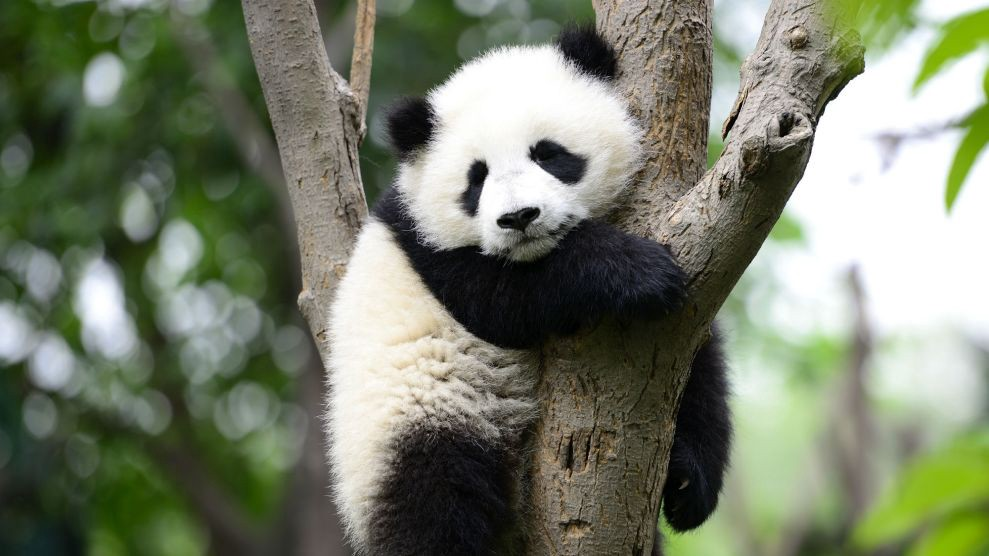

[Pandas](https://pandas.pydata.org/docs/index.html) ("Python Data Analysis Library") is arguably the most important tool for data scientists using Python. As the central component of the Python data science toolkit, pandas is essentially where your data will "live" when you're working in Python. Pandas is built on [NumPy](https://numpy.org), which means that many of the data structures of NumPy are used in pandas. Data stored in pandas `DataFrame`s are often analysed statistically in [SciPy](https://docs.scipy.org/doc/scipy/reference/), visualized using plotting functions from [Matplotlib](https://matplotlib.org), and fed into machine learning algorithms in [scikit-learn](https://scikit-learn.org/stable/).



This session will cover the basics of pandas, including `DataFrame` construction, importing data with pandas, `DataFrame` attributes, working with `datetime` objects, and data selection and manipulation. While this tutorial is designed to give you an overview of pandas, the [docs](https://pandas.pydata.org/docs/index.html) should the first place you look for more detailed information and additional pandas functionality. The pandas documentation is particularly well-written, making it easy to find methods and functions with numerous examples. Make the docs your best friend! 🐼

The Pandas library was originally developed by Wes McKinney, who is the author of the excellent [Python for Data Analysis](https://learning.oreilly.com/library/view/python-for-data/9781098104023/) book, which is now its third edition.

<p style="height:1pt"> </p>

<div class="boxhead2">
    Session Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 <code>Series</code> and <code>DataFrame</code> objects </li>
    <ul class="b">
        <li> Creating <code>Series</code> and <code>DataFrame</code> objects from scratch </li>
    </ul>
    <li> 📌 Importing data </li>
    <ul class="b">
        <li> <code>pd.read_csv()</code> </li>
        <li> Data cleaning </li>
    </ul>
    <li> 📌 Examining your DataFrame </li>
    <ul class="b">
        <li> Viewing your data </li>
        <li> <code>DataFrame</code> attributes </li>
    </ul>
    <li> 📌 DataFrame indexing + data selection </li>
    <ul class="b">
        <li> Indexing by position with <code>df.iloc</code> </li>
        <li> Row indexing: <code>df.loc</code> </li>
        <li> Column indexing: brackets, dot notation </li>
    </ul>
    <li> 📌 <code>Datetime</code> objects </li>
    <ul class="b">
        <li> Generating <code>datetime</code> objects </li>
        <li> Parsing dates in pandas </li>
    </ul>
    <li> 📌 DataFrame operations </li>
    <ul class="b">
        <li> DataFrame reduction </li>
        <li> Adding data </li>
        <li> Removing data </li>
        <li> Applying functions </li>
        <li> Combining DataFrames </li>
    </ul>
    <li> 📌 Data export </li>
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>



### Instructions
We will work through this notebook together. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top.

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

## Introduction to pandas
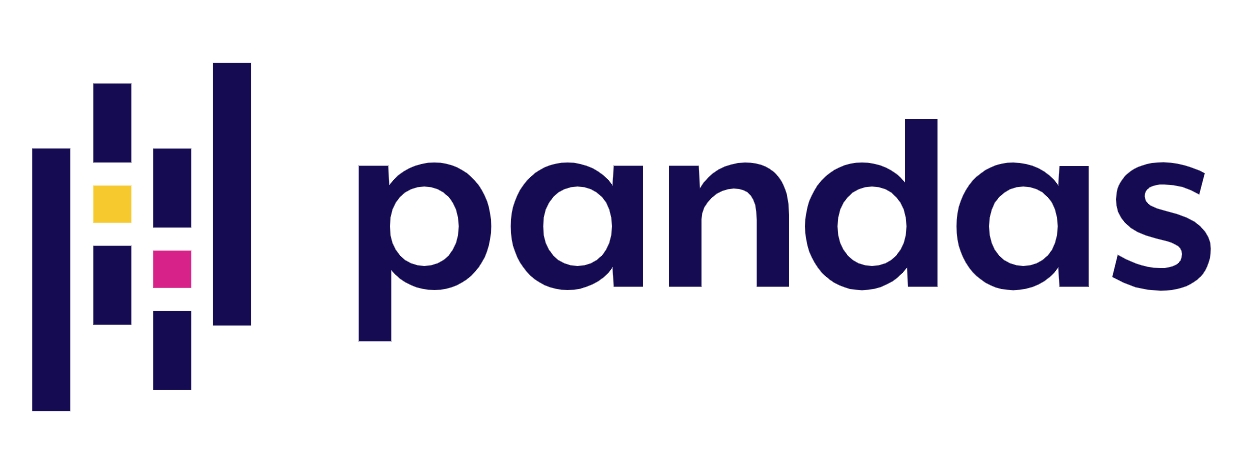

As always, we must begin by importing the pandas library. The standard import statement for pandas is:

```python
import pandas as pd
```

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
import pandas as pd

### `Series` and `DataFrame` objects
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

The core components of pandas are the `Series` and the `DataFrame` objects. Both of these are essentially enhanced versions of the NumPy array, with a few key differences: 1) pandas DataFrames can be *heterogeneous*, meaning that the columns can contain different data types; and 2) the rows and columns of DataFrames can be identified with labels (usually strings) in addition to standard integer indexing.

A `Series` is essentially a column of data, while a `DataFrame` is a multidimensional table made up of many `Series`, not unlike a spreadsheet: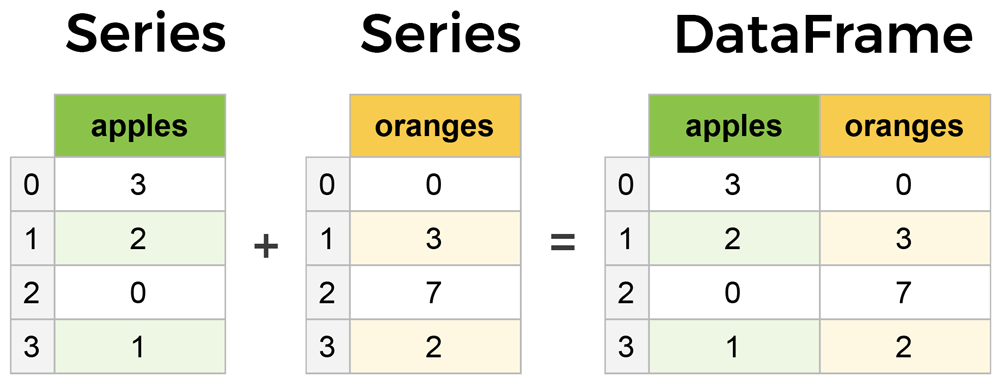

Series and DataFrames are similar in many respects – most common operations can be performed on both objects, though Series are more limited, as they can only ever contain a single column (i.e. you cannot turn a `Series` into a `DataFrame` by adding a column).

Both `Series` and `DataFrame` objects contain an `Index` object similar to the row index of the `ndarray` or the index of a list. The pandas `Index` object can be conceptualized as an immutable array or an ordered multiset. Unless explicitly defined otherwise, the `Index` of a `Series` or `DataFrame` is initialized as the ordered set of positive integers beginning at 0 (see figure above).



#### Creating `Series` and `DataFrame` objects from scratch

A `Series` can be easily created from a list or array as follows:

In [ ]:
# Create a Series from a list with numerical values
series = pd.Series([25.8, 16.2, 17.9, 18.8, 23.6, 29.9, 23.6, 22.1])

series

In [ ]:
# Create a Series from another list, with a string variable included - see the change on the dtype
series = pd.Series([5, 6, 7, '2.4', 5, 34, 67])

series

There are many ways to create a `DataFrame`, but the most common are to use a list of lists or a dictionary. First, let's use a list of lists (or an array):


In [ ]:
df = pd.DataFrame([[25.8, 29.4, 25.6, 54.6],
                   [34.5, 78.2, 86.2, 99.0],
                   [12.4, 75.4, 23.6, 88.5]],columns=['A', 'B', 'C', 'D'])

df

Much like with NumPy arrays, each inner list element in the outer list corresponds to a *row*. Using the optional `columns` keyword argument, we can specify the name of each column. If this parameter is not passed, the columns would be displayed with integer index values (like the rows).

Next, let's create a DataFrame from a `dict` object:


In [ ]:
#df = pd.DataFrame([[25.8, 29.4, 25.6, 54.6],
#                   [34.5, 78.2, 86.2, 99.0],
#                   [12.4, 75.4, 23.6, 88.5]],columns=['A', 'B', 'C', 'D'])

df = pd.DataFrame({
    'A':[25.8, 34.5, 12.4],
    'B':[29.4, 78.2, 75.4],
    'C':[25.6, 86.2, 23.6],
    'D':[54.6, 99.0, 88.5]
})

df

Using this method, each `key` corresponds to a column name, and each `value` is a column.


### Importing data
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

While you will likely create many DataFrames from scratch throughout your code, in most cases, you'll have some data you'd like to import as a starting point. Pandas has [several functions](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) to read in data from a variety of formats. For now, we'll focus on reading in data from plain-text flat files.

Most environmental datasets are stored as **flat files**, meaning that the data are unstructured – the records follow a uniform format, but they are not indexed and no information about relationships between records is included. Plain-text flat files use **delimiters** such as commas, tabs, or spaces to separate values. Pandas has a few different functions to import flat files, but perhaps the most useful is the `pd.read_csv()` function, designed to read CSV files. As its name suggests, a CSV (Comma Separated Values) file is a plain-text file that uses commas to delimit (separate) values. Each line of the file is a record (row).  

Let's start by taking a look at the [`pd.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
help(pd.read_csv)

As you can see, `pd.read_csv()` has *quite a few* parameters. Don't be overwhelmed – most of these are optional arguments that allow you to specify exactly how your data file is structured and which part(s) you want to import. In particular, the `sep` parameter allows the user to specify the type of delimiter used in the file. The default is a comma, but you can actually pass other common delimiters (such as `sep='\t'`, which is a tab) to import other delimited files. The only *required* argument is a string specifying the filepath of your file.


<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

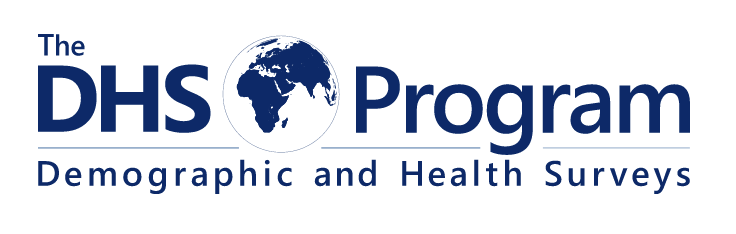

In this session, we'll import a CSV file with household survey data collected in 2014 by **The Demographic and Health Surveys (DHS) Program** in Ghana.

[DHS](https://dhsprogram.com/) are nationally-representative household surveys that provide data for a wide range of monitoring and impact evaluation indicators in the areas of population, health, and nutrition. The DHS Program has earned a worldwide reputation for collecting and disseminating accurate, nationally representative data on topics such as fertility, family planning, maternal and child health, gender, HIV/AIDS, malaria, nutrition, and environmental health. Health information is collected through interviews with women and men, as well as collection of biological samples to test for malaria, vitamin deficiencies, and many other health conditions.

The CSV file is located in the `Day2/data` folder.

The columns of this table are shown below:

| Column name | Description |
| :---------- | :---------- |
| **year**    | Time |
| **rural_urban**     | Household located in urban or rurual area |
| **cluster_id**     | ID of the survey cluster |
| **household_id** | ID of the household being surveyed |
| **mother_id** | ID of the mother being surveyed |
| **country** | Country of the survey |
| **stunting** | If the child in the household is stunting (1) or not (0) |
| **wasting** | If the child in the household is stunting (1) or not (0) |
| **haz_new** | Height for age as a z score, the lower means more under the mean |
| **waz_new** | Weight for age as a z score, the lower means more under the mean |
| **bmi_adult** | Body Mass Index (BMI) of the adult in the family |
| **wealth_index** | Wealth condition of the household  |
| **lat** | Latitude of the survey location (deliberately randomly shifted from original location for privacy)|
| **long**  | Longitude of the survey location (deliberately randomly shifted from original location for privacy) |


We can import the data into pandas using the following syntax:

```python
dhs = pd.read_csv('./data/Ghana-2014-DHS-Household-Filtered.csv')
```

<div class="example">
    ✏️ <b> Try it. </b>
    Copy and paste the code above to import the data in the CSV file into a pandas <code>DataFrame</code> named <code>bsrn</code>.
</div>

**File Path Note for Google Colab Users**

When working in Google Colab, file paths are different from local Jupyter notebooks:

- **Local Jupyter**: ` ./data/filename.csv ` (relative to notebook location)
- **Google Colab**: `drive/MyDrive/your-folder-structure/data/filename.csv` (after mounting Google Drive)

Make sure to:
1. Mount your Google Drive first
2. Use the full path from your Google Drive root
3. The path should match your actual folder structure in Google Drive
*note that when mounting the google drive it will ask for your permission. Once confirmed, it will grant access of google colab to your drive*

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dhs = pd.read_csv('drive/MyDrive/Climate-Health-Data-Science-Workshop/Day2/data/Ghana-2014-DHS-Household-Filtered.csv')
# './' refers to the current directory where the notebook file is running

dhs

#### A bit of housekeeping

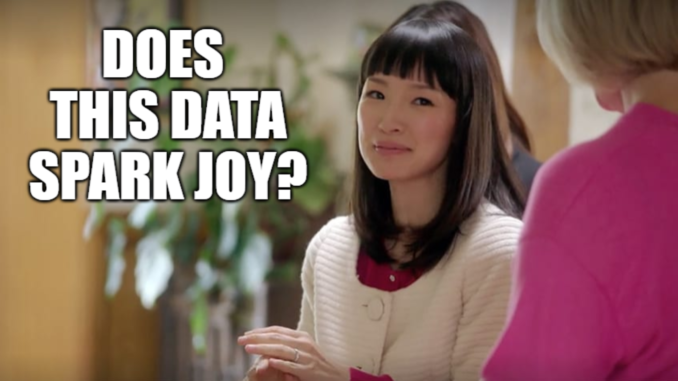

Before we move on into viewing and operating on the DataFrame, it's worth noting that data import is rarely ever this straightforward. Most raw data require considerable cleaning before they are ready for analysis. Often some of this must happen outside of Python to format the data for import, but ideally the majority of data preprocessing can be conducted in Python – allowing you to perform the same operations on multiple datasets at once and making the process easily repeatable.

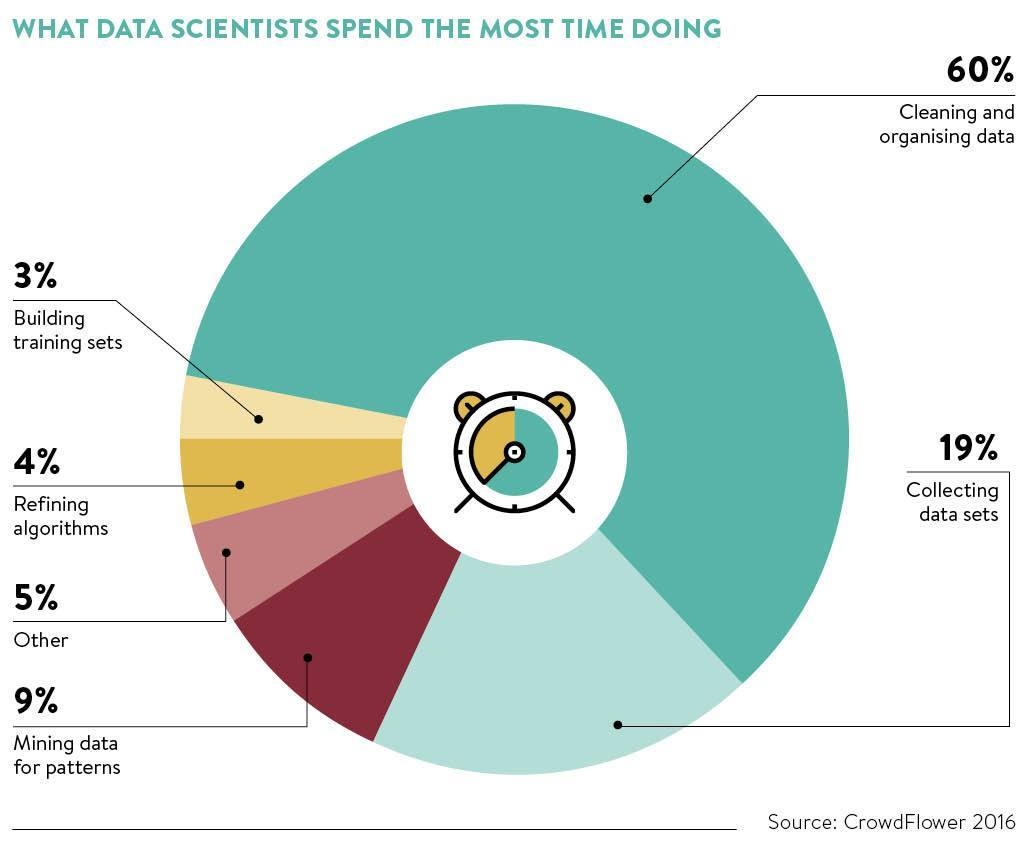


### Examining your DataFrame
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Now that we've loaded in our data, it would be useful to take a look at it. Given the size of our `dhs` DataFrame, however, we can't simply print out the entire table. The `df.head()` method allows us to quickly view the first five rows.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs.head(1)

Similarly, `df.tail()` prints the last five rows.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs.tail()

Both `df.head()` and `df.tail()` can also accept an integer argument, e.g. `df.head(n)`, where the first `n` rows will be printed.

<div class="example">
    ✏️ <b> Try it. </b>
    Print the first and last 10 rows of <code>bsrn</code> using <code>df.head()</code> and <code>df.tail()</code>.
</div>

In [ ]:
# print the first 10 rows of dhs

# print the last 10 rows of dhs


In addition to those for viewing your data, pandas has several methods to describe attributes of your `DataFrame`. For example, `df.info()` provides basic information about the DataFrame:

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs.info()

The `df.info()` method provides several different pieces of information about the DataFrame that are sometimes useful to retrieve separately. For example, `df.index` returns the index as an iterable object for use in plotting and the `df.columns` method returns the column names as an index object which can be used in a `for` loop or to reset the column names. These and other descriptive DataFrame methods are summarized in the table below.


| Method | Description |
| :----- | :---------- |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.info() </span> | Prints a concise summary of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.head(<i>n</i>) </span> | Returns the first *n* rows of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.tail(<i>n</i>) </span> | Returns the last *n* rows of the DataFrame |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.index </span> | Returns the index range (number of rows) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.columns </span> | Returns the column names |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.dtypes </span> | Returns a Series with the data types of each column indexed by column name |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.size </span> | Returns the total number of values in the DataFrame as an `int` |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.shape </span> | Returns the shape of the DataFrame as a tuple (*rows*,*columns*) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.values </span> | Returns the DataFrame values as a NumPy array (not recommended) |
| <span style="font-family: Lucida Console, Courier, monospace; font-weight: bold"> df.describe() </span> | Returns a DataFrame with summary statistics of each column |

In [ ]:
dhs.index

In [ ]:
dhs.columns

In [ ]:
dhs.dtypes

In [ ]:
dhs.size

In [ ]:
dhs.shape

### DataFrame indexing + data selection
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Because DataFrames can contain *labels* as well as *indices*, indexing in pandas DataFrames is a bit more complicated than we've seen with strings, lists, and arrays. Generally speaking, pandas allows indexing by either the integer index or the label, but the syntax is a bit different for each.

The index operator, which refers to the square brackets following an object `[]`, does not work quite like we might expect it to.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
# try to loacte to the last 6th column and last 3rd row
dhs[-6,-3]

Instead of a value, we get a `KeyError`. This is because the `Index` object in pandas is essentially a dictionary, and we have not passed proper `keys`.

Instead, pandas uses `df.iloc[]` for integer-based indexing to select data by position:


In [ ]:
# select the 3rd row and 2nd column
dhs.iloc[2,1]

`df.iloc` acts just like the index operator works with arrays. In addition to indexing a single value, `df.iloc` can be used to select multiple rows and columns via slicing: `df.iloc[row_start:row_end:row_step, col_start:col_end:col_step]`.

In [ ]:
# Select the last 6 rows and last 3 columns
dhs.iloc[-6:,-3:]

In [ ]:
# First 5 columns, every 40th row
dhs.iloc[::40,:5]

#### Row indexing

In addition to `df.iloc`, rows of a DataFrame can be accessed using `df.loc`, which "locates" rows based on their labels. Unless you have set a custom index (which we will see later), the row "labels" are the same as the integer index.

When indexing a single row, `df.loc` (like `df.iloc`) transforms the row into a `Series`, with the column names as the index:

```python
# Classic indexing
dhs.loc[500]
```
<p style="font-family: Lucida Console, Courier, monospace; margin-left: 22pt; margin-top: 0pt; margin-bottom: 0pt; color: #A514F6; font-weight: bold"> >>> </p>
<pre style="margin-top: 0pt;"><samp>year                       2014
rural_urban               rural
mother_id               33 4  2
household_id               33 4
country                   Ghana
stunting                    0.0
wasting                     0.0
haz_new                   -93.0
waz_new                     9.0
bmi_adult                2773.0
wealth_index             poorer
lat                    6.445297
long                  -0.857472
Name: 500, dtype: object
</samp></pre>

In [ ]:
# Classic indexing
dhs.loc[500]

In [ ]:
one_row = dhs.loc[0]
one_row

<div class="python">
    🐍 <b>DataFrames + data types.</b>  Notice that the <code>dtype</code> of the Series is an <code>object</code>. This is because the column contains mixed data types – floats, integers, and an <code>object</code> in the first row. Unlike NumPy, pandas allows both rows and columns to contain mixed data types. However, while it is perfectly fine (and, in fact, almost always necessary) to have multiple data types within a single <b><i>row</i></b>, it is best if each <b><i>column</i></b> is comprised of a <b><i>single data type</i></b>.
</div>

Slicing using `df.loc` is similar to `df.iloc`, with the exception that the `stop` value is ***inclusive***:</pre>


In [ ]:
# Using .loc
dhs.loc[1434:1440]

In [ ]:
# Using .iloc
dhs.iloc[1434:1440]

Did you see the difference of the two printed result?

#### Column indexing

In addition to integer indexing with `df.iloc`, columns can be accessed in two ways: dot notation `.` or square brackets `[]`. The former takes advantage of the fact that the columns are effectively "attributes" of the DataFrame and returns a Series:samp></pre>


In [ ]:
dhs.wealth_index

The second way of extracting columns is to pass the column name as a string in square brackets, i.e. `df['col']`:o the list:

In [ ]:
dhs['wealth_index']

Using single brackets, the result is a Series. However, using double brackets, it is possible to return the column as a DataFrame:o the list:

In [ ]:
dhs[['wealth_index']]

This allows you to add additional columns, which you cannot do with a `Series` object. Furthermore, with the double bracket notation, a list is being passed to the index operator (outer brackets). Thus, it is possible to extract multiple columns by adding column names to the list:

In [ ]:
new_df = dhs[['year', 'rural_urban', 'wealth_index']]
new_df.head()

### Handling NaN Values in pandas
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

As you may already notice, there are a decent amount of NaN/Null values on our DHS dataset - Do not worry, this is very common - We just need to know how to properly deal with them. Working with real-world data often involves dealing with missing or undefined values, represented as ***NaN (Not a Number)*** in pandas. Proper handling of NaN values is crucial for accurate data analysis and ensuring robust models. In the next few lines of codes, we'll briefly explore methods to identify, remove, and fill NaN values in pandas DataFrames and Series. <br>

NaN values can represent missing data, undefined calculations, or placeholder entries in a dataset. Understanding and managing these values is essential in data preprocessing steps.

#### Identify NaN values:
To detect NaN values in a DataFrame or Series, pandas provides the`pd. isna(`) function, which returns a boolean mask over the data indicating True where an element is NaN.

In [ ]:
# Identifying NaN values
nan_mask = dhs.isna()
nan_mask

If you want to isolate to print only the elements/rows/columns that contain NaN values, you can use the `df.isna().any()` function

In [ ]:
# Check for any NaNs in each row
nan_rows = dhs[dhs.isna().any(axis=1)]
nan_rows

#### Removing NaN Values
In some cases, you might want to exclude missing data from your analysis <br>

The common method is to use `pd.dropna()`, which allows you to remove rows or columns that contain NaN valuesues.

In [ ]:
# Dropping rows with any NaN values
dhs_dropped_rows = dhs.dropna()

dhs_dropped_rows

Did you notice what happen to the column index? and what happened to the size of the dataframe?

In [ ]:
# Dropping columns with any NaN values
dhs_dropped_columns = dhs.dropna(axis=1)

dhs_dropped_columns

#### Filling NaN Values
Instead of removing NaN values, you can replace them with a specified value or a computed statistic such as mean, median, or mod.
<br>We can use `pd.fillna()` to replace NaN values with a specified value or a computed value..

In [ ]:
# Filling NaN values with a specific value, e.g., 0
dhs_filled_zero = dhs.fillna(0)

dhs_filled_zero

In [ ]:
# Filling NaN values with the mean of each column
# However we need to first calculate all the mean for only numerical values

# Calculate mean only for numeric columns
numeric_means = dhs.select_dtypes(include='number').mean()

dhs_filled_mean = dhs.fillna(numeric_means)

dhs_filled_mean


For more sophisticated approaches, especially in time-series data, interpolation methods can be used to estimate the missing values<br>
To do this, we can use the `pd.interpolate()` function.

In [ ]:
# Interpolate using linear method
df_interpolated = dhs[['stunting', 'wasting', 'haz_new',	'waz_new','bmi_adult']].interpolate(method='linear')

df_interpolated


When accessing a single column, the choice between using dot notation and square brackets is more or less a matter of preference. However, there are occasions when the bracket notation proves particularly useful. For example, you could access each column in a DataFrame by iterating through `df.columns`, which returns an `Index` object containing the column names as `str` objects that can be directly passed to the index operator. Additionally, you may find it useful to use the double bracket syntax to return a `DataFrame` object, rather than a `Series`, which can only ever contain a single column of data.

### `Datetime` objects
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Although the DHS data used in this tutorial is only at year level, in reality, many environmental datasets include timed records at much finer temporal resolution (e.g., hourly, daily). Python has a few different libraries for dealing with timestamps, which are referred to as **datetime** objects. The standard [**`datetime`**](https://docs.python.org/3/library/datetime.html) library is the primary way of manipulating dates and times in Python, but there are additional third-party packages that provide additional support. A few worth exploring are [**`dateutil`**](https://dateutil.readthedocs.io/en/stable/), an extension of the datetime library useful for parsing timestamps, and [**`pytz`**](http://pytz.sourceforge.net), which provides a smooth way of tackling time zones.

Though we will not review `datetime` objects in depth here, it is useful to understand the basics of how to deal with `datetime` objects in Python as you will no doubt encounter them in the future. For now, we will focus on a few pandas functions built on the datetime library to handle `datetime` objects.

The `pd.date_range()` function allows you to build a DatetimeIndex with a fixed frequency. This can be done by specifying a start date and an end date as follows:

In [ ]:
# create a pandas DatetimeIndex - note the date format is '%m/%d/%Y'
pd.date_range('3/1/2023','4/2/2023')

Because it was not specified otherwise, the frequency was set as the default, daily. To return a different frequency, we could use the `freq` parameter:


In [ ]:
# Specify start and end, minute-ly frequency
pd.date_range('1/1/2023','1/31/2023', freq='min')

In [ ]:
# Specify start and end, monthly frequency
pd.date_range('1/1/2023','12/31/2023', freq='ME')

There are many other parameters for the `pd.date_range()` function, as well as other pandas functions. More useful to us, however, are the functions for dealing with *existing* timestamps, such as those in our `dhs` DataFrame.


**For demostration purpose, let's create a new colum named `'date'` for the `dhs` dataframe. The `'date'` column contains pseudo timestamps for each record of household survey**


In [ ]:
# import packages to create timestamps
from datetime import datetime, timedelta

# Set a start datetime to January 1, 2014
start_datetime = datetime(2014, 1, 1)

# Generate hourly timestamps
dhs['date'] = [start_datetime + timedelta(hours=i) for i in range(len(dhs))]
dhs['date'].astype(object) # this will convert the column data type to 'object'/string


#### Parsing dates in pandas

Let's start by taking a look at `dhs.date`, which contains the timestamps for each record of our dhs data.

In [ ]:
dhs.date
# OR dhs['date']

While the values certainly resemble `datetime` objects, they are stored in pandas as "objects," which basically means that pandas doesn't recognize the data type – it doesn't know how to handle them. <br>Using the `pd.to_datetime()` function, we can convert this column to `datetime` objects:

In [ ]:
pd.to_datetime(dhs.date)

Notice that ostensibly nothing has changed, but the `dtype` is now a `datetime` object, making it much easier to manipulate not only this column, but the entire DataFrame. For instance, now that we've told pandas that this column contains timestamps, we can set this column as the index using `df.set_index()`.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs['date'] = pd.to_datetime(dhs.date)  # Note: overwriting a column like this is NOT recommended.
# Set bsrn.DATE as the DataFrame index
dhs.set_index('date', inplace=True)
dhs.head()

As noted in the comment in the cell above, reseting the values in a column as we did in the first line of code is generally not recommended, but in this case, since we knew exactly what the result would be, it's acceptable. Also, notice the `inplace=True` argument passed to `df.set_index()`. This prevented us from having to copy the DataFrame to a new variable, instead performing the operation *in-place*.

Let's take a look at our DataFrame again:

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs.info()

As expected, the index has been changed to a `DatetimeIndex`, and there is no longer a `'date'` column. Had we wanted to keep the timestamps as a column as well, we could have passed `drop=False` to `df.set_index()`, telling pandas not to *drop* (or *delete*) the `'DATE'` column. We can look at the `DatetimeIndex` just as before using `df.index`.

<div class="run">
    ▶️ <b> Run the cell below. </b>
</div>

In [ ]:
dhs.describe()

Now that we have a `DatetimeIndex`, we can access specific attributes of the `datetime` objects like the year, day, hour, etc. To do this, we add the desired time period using dot notation: `df.index.attribute`. For a full list of attributes, see the [`pd.DatetimeIndex` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html). For example:

In [ ]:
# Get the hour of each record
dhs.index.hour

In [ ]:
dhs.index.unique()


The result is a pandas `Index` object with the same length as the original DataFrame. To return only the unique values, we use the `Series.unique()` function, which can be used on any `Series` object (including a column of a DataFrame):

In [ ]:
# Get the unique hour values
dhs.index.hour.unique()

### A few useful operations
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

Now, we'll explore `DataFrame` reduction operations, how to add and delete data, and concatenation in pandas.

#### `DataFrame` reduction

Much like NumPy, pandas has several useful methods for *reducing* data to a single statistic. These are intuitively named and include: `df.mean()`, `df.median()`, `df.sum()`, `df.max()`, `df.min()`, and `df.std()`. Unlike array reduction, however, these basic statistical methods in pandas operate *column-wise*, returning a Series containing the statistic for each column indexed by column name. For example:





In [ ]:
# try to run the following code
dhs.median()

Wupos - we got an error! Why? this is because such operations require all the included columns' type to be numerical

In [ ]:
# create a all numerical code and check the results
df = pd.DataFrame({
    'A':[25.8, 34.5, 12.4],
    'B':[29.4, 78.2, 75.4],
    'C':[25.6, 86.2, 23.6],
    'D':[54.6, 99.0, 88.5]
})

# Calculate median of each column
df.median()

To retrieve the value for just a single column, you can use indexing to call the column as a Series:

In [ ]:
# Calculate median of the bmi_adult column
dhs['bmi_adult'].median()

In [ ]:
# Calculate mean of the bmi_adult column
dhs['bmi_adult'].mean()

In [ ]:
# Calculate max of the bmi_adult column
dhs['bmi_adult'].max()

In [ ]:
# Calculate min of the bmi_adult column
dhs['bmi_adult'].min()

In [ ]:
# Calculate sum of the bmi_adult column
dhs['bmi_adult'].sum()

In [ ]:
# Calculate standard deviation of the bmi_adult column
dhs['bmi_adult'].std()

Furthermore, as you may alrady notice, there are lots of NaN values in our `dhs` dataframe. <br>Pandas default behaviour is to **ignore NaN values** when performing computations. This can be changed by passing `skipna=False` to the reduction method (e.g. `df.median(skipna=False)`), though skipping NaNs is often quite useful!

#### Adding data

Just like we did before when creating the `date` column, a column can be added to a DataFrame using square bracket notation with a new column label as a string. The data for the new column can come in the form of a list, Series, or a single value:


In [ ]:
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],
                   [17.9, 14.2, 18.8, 28.0],
                   [23.6, 18.4, 29.9, 27.8],
                   [23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])

**Add a column from a list**

```
df['E'] = [13.0, 40.1, 39.8, 28.2]
```
**Add a column from a Series**
```
df['F'] = pd.Series([18, 22, 30, 24])
```
**Propagate a single value through all rows**
```
df['G'] = 'blue'
df
```


In [ ]:
# Add a column from a list
df['E'] = [13.0, 40.1, 39.8, 28.2]
# Add a column from a Series
df['F'] = pd.Series([18, 22, 30, 24])
# Propagate a single value through all rows
df['G'] = 'blue'

df

New columns can also be added as the result of an arithmetic operation (e.g. sum, product, etc.) performed on one or more existing columns:

In [ ]:
# Add a new column by converting values in df.A from °C to °F
df['A_degF'] = (df['A'] * (9/5)) + 32

# Add a new column representing the difference between df.B and df.C
df['BC_diff'] = df.B - df.C

df

Finally, you can use a Boolean expression to add a column, which contains **Boolean** objects (`True` or `False`) based on the condition. For example:

In [ ]:
# Add a column with Booleans for values in df.D greater than or equal to 20.0
df['D_20plus'] = df.D >= 20.0

df

These conditional expressions can also be used to create **Boolean masks**, which allow you to "mask" the values in the DataFrame that do not meet a condition, only extracting those that do. For example, let's use a Boolean mask to apply an mathematical expression on only certain values in column `'D'`:

In [ ]:
# Subtract 20 from all values in dfD greater than or equal to 20
df['D_less20'] = df.D[df.D >= 20.0] - 20.0

df


All values that do not meet the condition are hidden from the expression, leaving **NaNs** in the resulting column. Boolean masks come in quite handy in data analysis, as they allow you to extract certain rows from a DataFrame based on their values in one or more columns.

Furthermore, in addition to simply **adding** columns, new columns can be **inserted** in a desired index position using `df.insert()` with arguments specifying the *location*, *name*, and *values* of the column:


In [ ]:
# Create list of seasons
seasons = ['winter', 'spring', 'summer', 'fall']

# Insert season as first column
df.insert(0, 'SEASON', seasons)

df

#### Removing data

Unlike adding new data columns, *removing* columns from a DataFrame should be done with caution. In fact, it's not a bad idea to create a copy of your DataFrame before performing *any* operations. This will allow you to return to the original data as needed without having to re-import or re-initialize the DataFrame. If you do need to remove a column, you can use the `del` command:

In [ ]:
# Delete 'G' from df
del df['G']

df

Note that this is an *in-place* operation, meaning that the column is deleted from the original variable. Alternatively, you can use `df.pop()` to **extract** a column. This method allows a column values to be extracted (and deleted) from a DataFrame and assigned to a new variable:


In [ ]:
# Extract column 'F' from df as a new Series
df_F = df.pop('F')

df

#### Applying functions
In addition to manipulating individual columns, you can apply a function to an entire Series or DataFrame using the pandas function `df.apply()`. For example, consider our original DataFrame `df`, which consists of temperature values in °C:


In [ ]:
df = pd.DataFrame([[25.8, 28.1, 16.2, 11.0],[17.9, 14.2, 18.8, 28.0],
                   [23.6, 18.4, 29.9, 27.8],[23.6, 36.2, 22.1, 14.5]],
                 columns=['A','B','C','D'])
df

We previously used arithmetic operators to convert column `'A'` to °F, but we could also use a function. First, let's define a function `convert_CtoF` to convert temperature values from Celsius to Fahrenheit:


In [ ]:
def convert_CtoF(degC):
    """ Converts a temperature to from Celsius to Fahrenheit

    Parameters
    ----------
        degC : float
            Temperature value in °C

    Returns
    -------
        degF : float
            Temperature value in °F
    """

    degF = (degC *(9./5)) + 32

    return degF

Using `df.apply()` we can use this function to convert values in column `'A'` as follows:

In [ ]:
df['A'].apply(convert_CtoF)

Where this becomes especially useful is for operating on entire DataFrames. You have to be careful with this if your DataFrame contains multiple data types, but it works well when you need to perform an operation on an entire DataFrame. For example, we could convert all of the values in `df` by iterating through the columns, or, using `df.apply()`, we could acheive the same result in a single line of code:

In [ ]:
df.apply(convert_CtoF)

#### Combining DataFrames

There are several ways to combine data from multiple Series or DataFrames into a single object in pandas. These functions include [`pd.append()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html#pandas.DataFrame.append), [`pd.join()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join), and [`pd.merge()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge). We will focus on the general [`pd.concat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function, which is the most versatile way to concatenate pandas objects. To learn more about these other functions, refer to the pandas documentation or see <a href="https://proquest-safaribooksonline-com.proxy.library.ucsb.edu:9443/book/programming/python/9781491912126/3dot-data-manipulation-with-pandas/introduction_to_pandas_html"> Chapter 3</a> of the <a href="https://proquest-safaribooksonline-com.proxy.library.ucsb.edu:9443/book/programming/python/9781491912126"> <i>Python Data Science Handbook</i></a>.

Let's start by considering the simplest case of two DataFrames with identical columns:


In [ ]:
df1 = pd.DataFrame([['Los Angeles', 34.0522, -118.2437],
                    ['Bamako', 12.6392, 8.0029],
                    ['Johannesburg', -26.2041, 28.0473],
                    ['Cairo', 30.0444, 31.2357]],
                  columns=['CITY', 'LAT', 'LONG'])

df2 = pd.DataFrame([['Cape Town', -33.9249, 18.4241],
                    ['Kyoto', 35.0116, 135.7681],
                    ['London', 51.5074, -0.1278],
                    ['Cochabamba', -17.4140, -66.1653]],
                  columns=['CITY', 'LAT', 'LONG'])


Using `pd.concat([df1,df2])`, we can combine the two DataFrames into one. Notice that we must pass the DataFrames as a *list*, because `pd.concat()` requires an *iterable object* as its input.


In [ ]:
# Concatenate df1 and df2
city_coords = pd.concat([df1,df2])

city_coords


By default, pandas concatenates along the *row* axis, appending the values in `df2` to `df1` as new rows. However, notice that the original index values have been retained. Since these index labels do not contain useful information, it would be best to reset the index before proceeding. This can be done in one of two ways. First, we could have passed `ignore_index=True` to the `pd.concat()` function, telling pandas to ignore the index labels. Since we have already created a new variable, however, let's use a more general method: `df.reset_index()`.

In [ ]:
# Reset index in-place and delete old index
city_coords.reset_index(inplace=True, drop=True)

city_coords

By passing the optional *`inplace`* and *`drop`* parameters, we ensured that pandas would reset the index *in-place* (the default is to return a new DataFrame) and *drop* the old index (the default behaviour is to add the former index as a column).

Now let's consider the case of concatenating two DataFrames whose columns do not match. In this case, pandas will keep source rows and columns separate in the concatenated DataFrame, filling empty cells with NaN values:

In [ ]:
df3 = pd.DataFrame([['USA', 87],['Mali', 350],['South Africa', 1753],['Egypt', 23],
                    ['South Africa', 25],['Japan', 47],['UK', 11],['Bolivia', 2558]],
                  columns=['COUNTRY', 'ELEV'])

# Concatenate cities1 and df3
pd.concat([city_coords,df3])

Instead, we must pass `axis=1` to the function to specify that we want to add the data in `df3` as columns to the new DataFrame:

In [ ]:
# Concatenate along column axis
cities = pd.concat([city_coords,df3], axis=1)

cities

#### Merging and Joining DataFrames in Pandas
Merging and joining are key techniques in pandas that allow you to combine datasets from different sources into a single DataFrame. This enables comprehensive analysis across related data.

- Merge: Uses [`pd.merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function to align rows from two DataFrames based on common keys, similar to SQL joins.

Also, you can use the [`pd.join()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) function to join two datasets, with different methods. Join Types:
- Inner Join: Only rows with matching keys in both DataFrames.
- Outer Join: All rows from both DataFrames, with NaNs for missing matches.
- Left Join: All rows from the left DataFrame, and matching rows from the right, with NaNs for missing matches.
- Right Join: All rows from the right DataFrame, and matching rows from the left, with NaNs for missing matches.


In [ ]:
# DataFrame 1: Health conditions data by region
health_data = {
    'Region': ['Greater Accra', 'Ashanti', 'Northern', 'Volta', 'Eastern'],
    'Malaria Cases': [10000, 7500, 9500, 6700, 4300],
    'Diarrhea Cases': [3000, 1900, 2200, 1500, 1400]
}
health_df = pd.DataFrame(health_data)
health_df

In [ ]:
# DataFrame 2: Healthcare facilities data
facilities_data = {
    'Region': ['Greater Accra', 'Ashanti', 'Northern', 'Volta', 'Central'],
    'Hospitals': [25, 18, 15, 12, 9],
    'Clinics': [40, 35, 30, 25, 20]
}
facilities_df = pd.DataFrame(facilities_data)
facilities_df

Merging the DataFrames on 'Region'

In [ ]:
# This will perform an inner join by default, including only regions found in both DataFrames
merged_df = pd.merge(health_df, facilities_df, on='Region')
print("Merged DataFrame (Inner Join):")
merged_df

In [ ]:
# To perform an outer join, which includes all regions from both DataFrames, we use the 'how' parameter
outer_merged_df = pd.merge(health_df, facilities_df, on='Region', how='outer')
print("\nMerged DataFrame (Outer Join):")
outer_merged_df

In [ ]:
# Let's also demonstrate a left join, showing all entries from the health_df and matching entries from facilities_df
left_merged_df = pd.merge(health_df, facilities_df, on='Region', how='left')
print("\nMerged DataFrame (Left Join):")
left_merged_df

In [ ]:
# Similarly, a right join can be shown, which will focus on entries from the facilities_df
right_merged_df = pd.merge(health_df, facilities_df, on='Region', how='right')
print("\nMerged DataFrame (Right Join):")
right_merged_df

### Data export
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

While you will most likely use pandas DataFrames to manipulate data, perform statistical analyses, and visualize results *within* Python, you may encounter scenarios where it is useful to "save" a DataFrame with which you've been working. Exporting data from pandas is analogous to importing it.

Let's take the example of the `cities` DataFrame we created in the last example. Now that we've compiled GPS coordinates of various cities, let's say we wanted to load these data into a GIS software application. We could export this DataFrame using `df.to_csv()` specifying the file name with the full file path as follows:

```python
cities.to_csv('./exports/cities.csv')
```


**Data Export in Google Colab - Saving to Google Drive**

**Option 1: Export to Google Drive (Recommended)**

When working in Google Colab, the best practice is to export your processed data directly to Google Drive. This approach offers several advantages:

Example Syntax:
```python
cities.to_csv('drive/MyDrive/path-to-your-output-file')
```

### File Path in Python
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

When working with files in Python, it's common to manage file paths—especially in projects that involve data analysis, file manipulation, or when your code needs to be shared or run on different systems. Here's a brief introduction on file paths and why joining them is a standard practice:

#### Understanding File Path

A file path provides the specific location of a file on a computer. It consists of a sequence of directories that leads to the file. There are two types:

1. **Absolute Paths**: These provide the complete details needed to locate a file, starting from the root element of the file system. Example: `'C:/Users/username/Documents/file.txt'`
2. **Relative Paths**: These are partial paths based on the current working directory. They are more flexible for projects that might be moved to a different folder structure. Example: `'./data/Ghana-2014-DHS-Household-Filtered.csv'`

#### Joining File Paths in Python
Joining file paths involves combining different parts of a path into a single path string using a method that is aware of the operating system's path separator (e.g., slashes in Unix/Linux or backslashes in Windows)

Using `os.path.join()` function enhances portability by automatically handling path separators for different operating systems, making your code adaptable. It also improves code readability and maintenance by organizing file paths effectively, and reduces errors such as missing or doubled separators

In [ ]:
import os

# Path to the base directory of this workshop folder - you can modify it based on your file location
base_dir = 'path to your base folder' # you can modify this to 'drive/MyDrive/Climate-Health-Data-Science-Workshop'

# relative location path file within the base directory
filename = 'Day2/data/DhsPrevalenceWCovar.csv'

full_path = os.path.join(base_dir, filename)

print(full_path)

In [ ]:
df = pd.read_csv(full_path)
df

### Congratulations!

You made it to the end of your first journey with Pandas.


# On your own


Exercise on Series:

In [ ]:
# Create a Series of prevelant health conditions in Ghana

In [ ]:
# Display the first 4 prevelant health conditions/diseases

In [ ]:
# Sort the diseases alphabetically # hint: you can use the sort_values() funtion

Exercise on Pandas Dataframe:

In [ ]:
# Create a DataFrame containing monthly average temperatures and pricipitation for various cities in Ghana.


In [ ]:
# what is the mean, max, min, etc for temperature and pricipitation?


In [ ]:
# Add a new column called 'population' of each Ghanian city to the data frame you just created


In [ ]:
# Create another Dataframe containing some health data e.g., monthly average number of malaria cases reported
# for the same Ghana cities


In [ ]:
# Merge the weather DataFrame with the Health Dataframe into one data drame

In [ ]:
# on the merged data frame, calculate a new variable e.g., the percentage of people with malaria in each city

In [ ]:
# calculate the correlation between two variables, e.g., rainfall and repotred malaria cases